**PROBLEM STATEMENT--**
classify the Size_Categorie using SVM

month of the year: 'jan' to 'dec'  
day of the week: 'mon' to 'sun'  
FFMC index from the FWI system: 18.7 to 96.20  
DMC index from the FWI system: 1.1 to 291.3  
DC index from the FWI system: 7.9 to 860.6  
ISI	index from the FWI system: 0.0 to 56.10  
temp	temperature in Celsius degrees: 2.2 to 33.30  
RH	relative humidity in %: 15.0 to 100  
wind=wind speed in km/h: 0.40 to 9.40  
rain	outside rain in mm/m2 : 0.0 to 6.4  
Size_Categorie 	the burned area of the forest ( Small , Large)  

In [2]:
# import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [4]:
df=pd.read_csv('/content/forestfires.csv')


In [5]:
df


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
# Feature selection : In this dataset month and day non-influential features
df=df.iloc[:,2:31]
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [14]:
df.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [15]:
df.info

<bound method DataFrame.info of      FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         1   

     monthoct  monthsep  size_category  
0           0         0          small  
1           1         0          small  
2           1         0          small  
3           0         0          small  
4           0         0          small  
..        ...       ...            ...  
512         0         0          large  
513         0         0          large  
514         0         0          large  
515         0         0          small  
516         0         0          small  

[517 rows x 29 columns]>

array([[<Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'RH'}>, <Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'dayfri'}>],
       [<Axes: title={'center': 'daymon'}>,
        <Axes: title={'center': 'daysat'}>,
        <Axes: title={'center': 'daysun'}>,
        <Axes: title={'center': 'daythu'}>,
        <Axes: title={'center': 'daytue'}>],
       [<Axes: title={'center': 'daywed'}>,
        <Axes: title={'center': 'monthapr'}>,
        <Axes: title={'center': 'monthaug'}>,
        <Axes: title={'center': 'monthdec'}>,
        <Axes: title={'center': 'monthfeb'}>],
       [<Axes: title={'center': 'monthjan'}>,
        <Axes: title={'center': 'monthjul'}>,
        <Axes: title={'center': 'monthjun'}>,
        <A

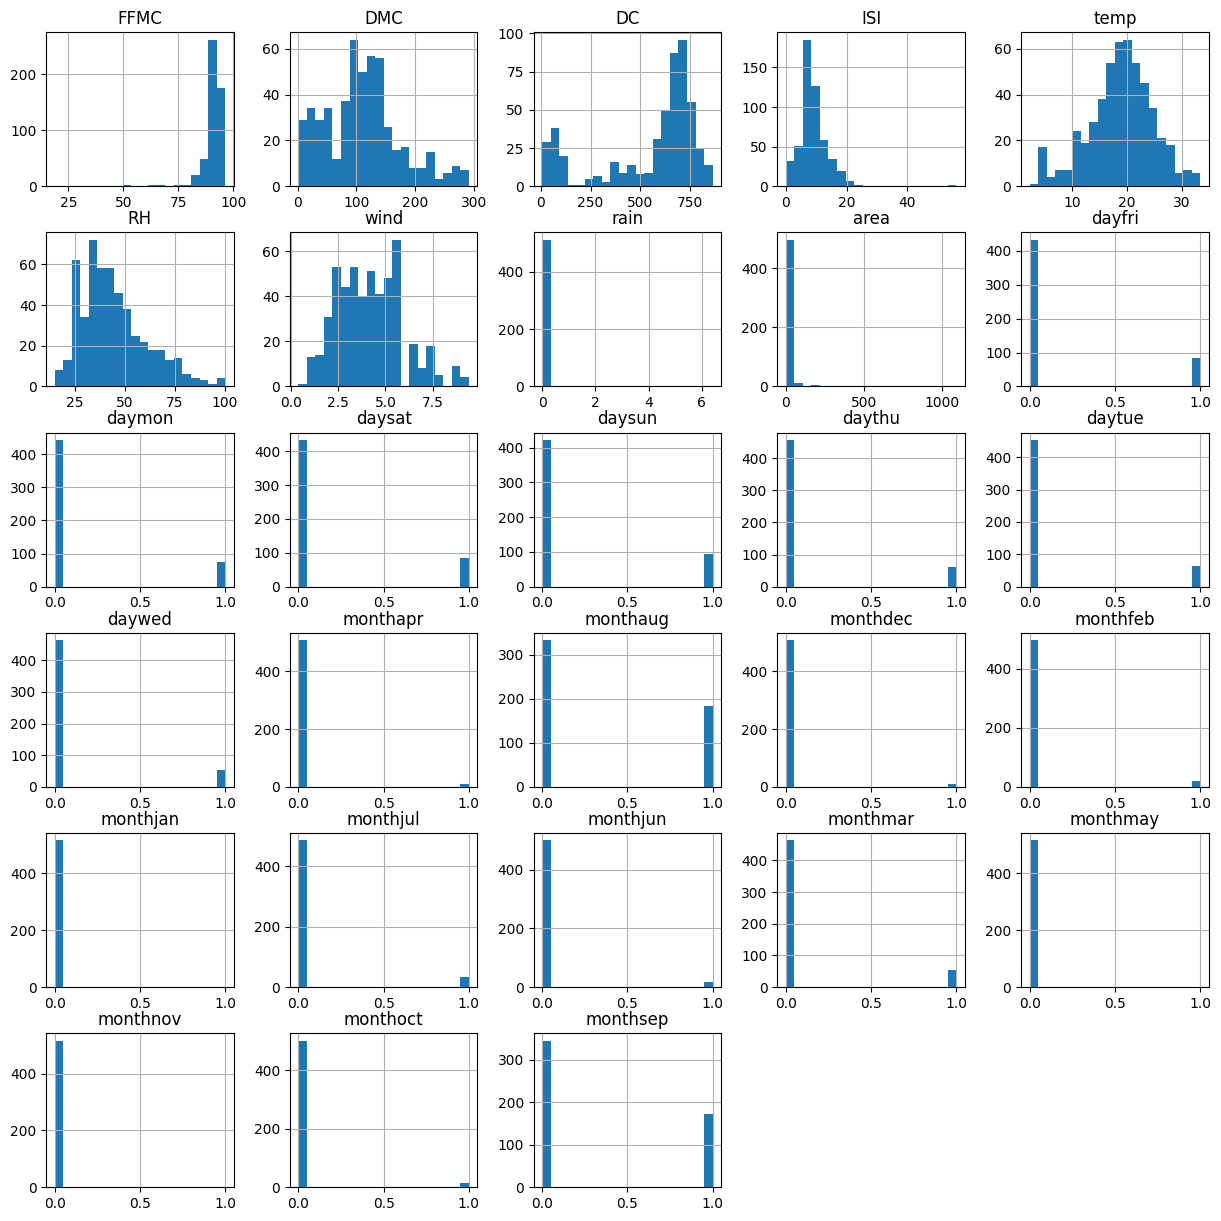

In [16]:
df.hist(figsize=(15,15),bins=20)

In [19]:
# Divide the data into feature and target variables
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [20]:
#feature scaling
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled)
X_scaled


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020,2.254407,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020,2.254407,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
515,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081


In [21]:
# Split the data into Train and Test sets
xtrain,xtest,ytrain,ytest=train_test_split(X_scaled,Y,test_size=0.3,random_state=42)

In [22]:
# Initialization of SVM classifier
clf=SVC(kernel='rbf',gamma=5)
clf.fit(xtrain,ytrain)
y_pred=clf.predict(xtest)
acc=accuracy_score(ytest,y_pred)*100
print('Accuracy',acc)
confusion_matrix(ytest,y_pred)

Accuracy 74.35897435897436


array([[  3,  38],
       [  2, 113]])

**Hypertunning by using GridSearchCV Method**

**1.RBF=Radial Basis Function**

In [23]:
num_folds=10
kfold=KFold(n_splits=num_folds)

svm_classifier=SVC()
param_grid=[{'kernel':['rbf'],'gamma':[1,0.80,0.60,0.40,0.10,0.09,0.08,0.07,0.06,0.05],'C':[50,60,10,11,12,13,14,1]}]
gsv=GridSearchCV(estimator=svm_classifier,param_grid=param_grid,cv=kfold)
gsv.fit(xtrain,ytrain)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid=[{'C': [50, 60, 10, 11, 12, 13, 14, 1],
                          'gamma': [1, 0.8, 0.6, 0.4, 0.1, 0.09, 0.08, 0.07,
                                    0.06, 0.05],
                          'kernel': ['rbf']}])

In [26]:
print('BEST HYPERPARAMETER:',gsv.best_params_),
print('BEST SCORES:',gsv.best_score_*100) #83% accuracy

BEST HYPERPARAMETER: {'C': 60, 'gamma': 0.05, 'kernel': 'rbf'}
BEST SCORES: 83.1006006006006


In [27]:
#evalution of gamma=0.05 and C=60
clf=SVC(kernel='rbf',gamma=0.05,C=60)
clf.fit(xtrain,ytrain)
y_pred=clf.predict(xtest)
acc=accuracy_score(ytest,y_pred)*100
print('Accuracy',acc)
confusion_matrix(ytest,y_pred)

Accuracy 82.6923076923077


array([[ 21,  20],
       [  7, 108]])

**2.POLYNOMIAL**

In [28]:
poly_clf=SVC(kernel='poly')
poly_clf.fit(xtrain,ytrain)
y_pred_poly=poly_clf.predict(xtest)
acc=accuracy_score(ytest,y_pred_poly)*100
print('POLYNOMIAL ACCURACY:',acc)

POLYNOMIAL ACCURACY: 74.35897435897436


In [29]:
#hypertunning
clf=SVC()
param_grid=[{'kernel':['poly'],'gamma':[50,5,10,.5,.2],"C":[1000,500,50,15,14,13,12,11,0.1,0.01,0.001]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(xtrain,ytrain)
gsv.best_params_,gsv.best_score_

({'C': 1000, 'gamma': 50, 'kernel': 'poly'}, 0.8006006006006006)

**CONCLUSION--**The RBF model gives the best accuracy of 83% with C =60 and gamma =0.05


